<a href="https://colab.research.google.com/github/glr6876/data_practice/blob/main/fashion5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [16]:
train_scaled = train_input.reshape(-1, 28, 28, 1)/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [17]:
model = keras.Sequential()


In [18]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.add(keras.layers.MaxPooling2D(2))

In [20]:
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [21]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [23]:
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.7364 - loss: 0.7343 - val_accuracy: 0.8659 - val_loss: 0.3643
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 43ms/step - accuracy: 0.8636 - loss: 0.3805 - val_accuracy: 0.8882 - val_loss: 0.2933
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.8853 - loss: 0.3159 - val_accuracy: 0.9044 - val_loss: 0.2577
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 41ms/step - accuracy: 0.9039 - loss: 0.2715 - val_accuracy: 0.9110 - val_loss: 0.2463
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.9080 - loss: 0.2531 - val_accuracy: 0.9142 - val_loss: 0.2415
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.9160 - loss: 0.2339 - val_accuracy: 0.9137 - val_loss: 0.2315
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.9191 - loss: 0.2168 - val_accuracy: 0.9169 - val_loss: 0.2335
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.9277 -

In [24]:
model = keras.models.load_model('best-cnn-model.keras')
model.layers

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

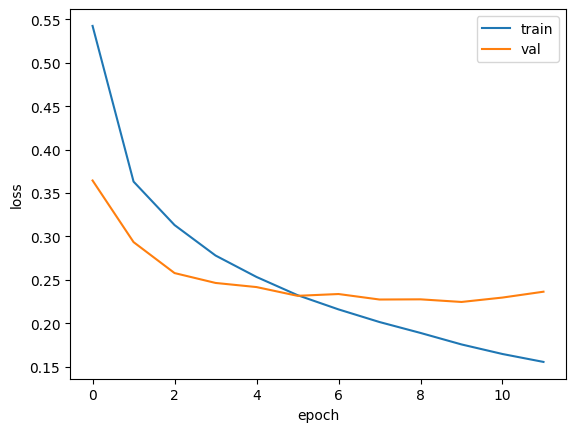

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [26]:
print(early_stopping_cb.stopped_epoch)

11


In [27]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [28]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.min(), conv_weights.std())

-1.4485306 0.24066801


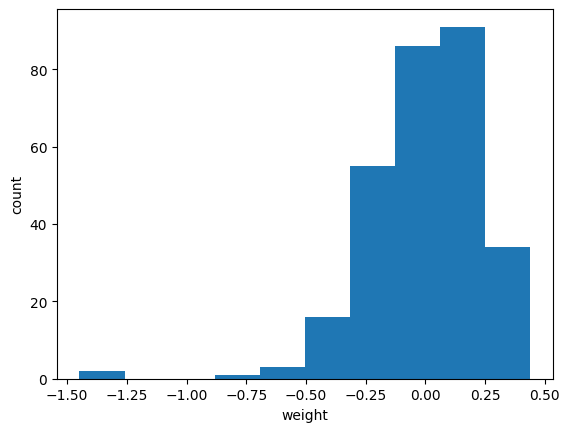

In [29]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

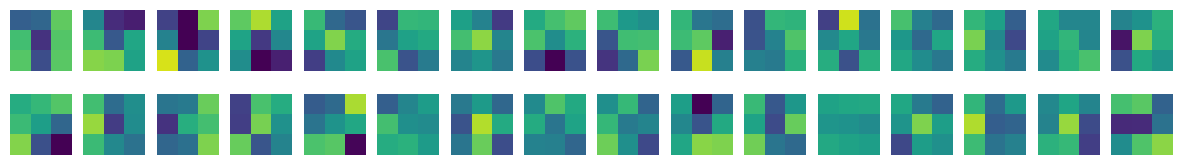

In [31]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i][j].imshow(conv_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
    axs[i][j].axis('off')
plt.show()

In [32]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [34]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.min(), no_training_weights.std())

-0.14114183 0.08467369


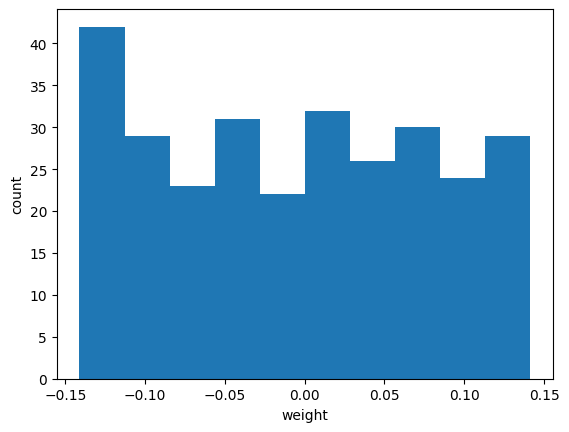

In [35]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

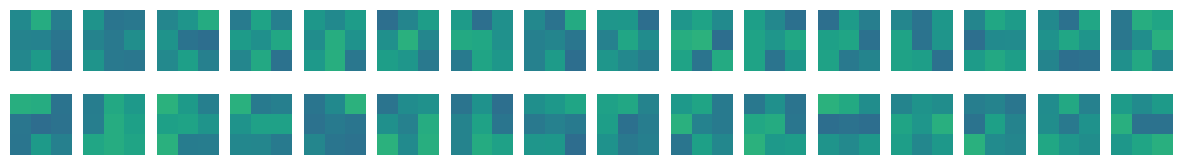

In [36]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i][j].imshow(no_training_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
    axs[i][j].axis('off')
plt.show()

In [37]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [40]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer_1>]


In [41]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

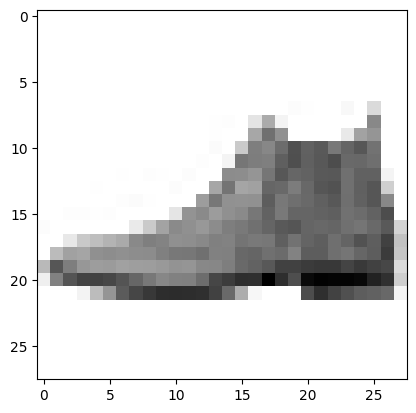

In [42]:
plt.imshow(test_input[0], cmap='gray_r')
plt.show()

In [43]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_1']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


In [44]:
print(feature_maps.shape)

(1, 28, 28, 32)


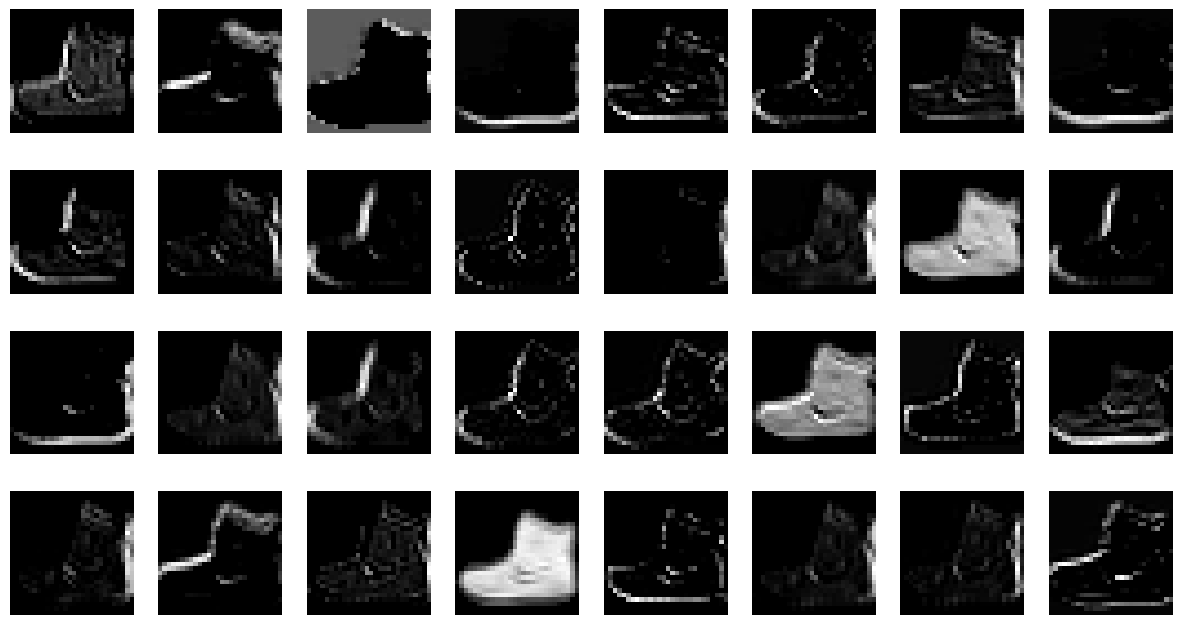

In [45]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i][j].imshow(feature_maps[0, :, :, i*8+j], cmap='gray')
    axs[i][j].axis('off')
plt.show()

In [46]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_1']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


In [47]:
print(feature_maps.shape)

(1, 14, 14, 64)


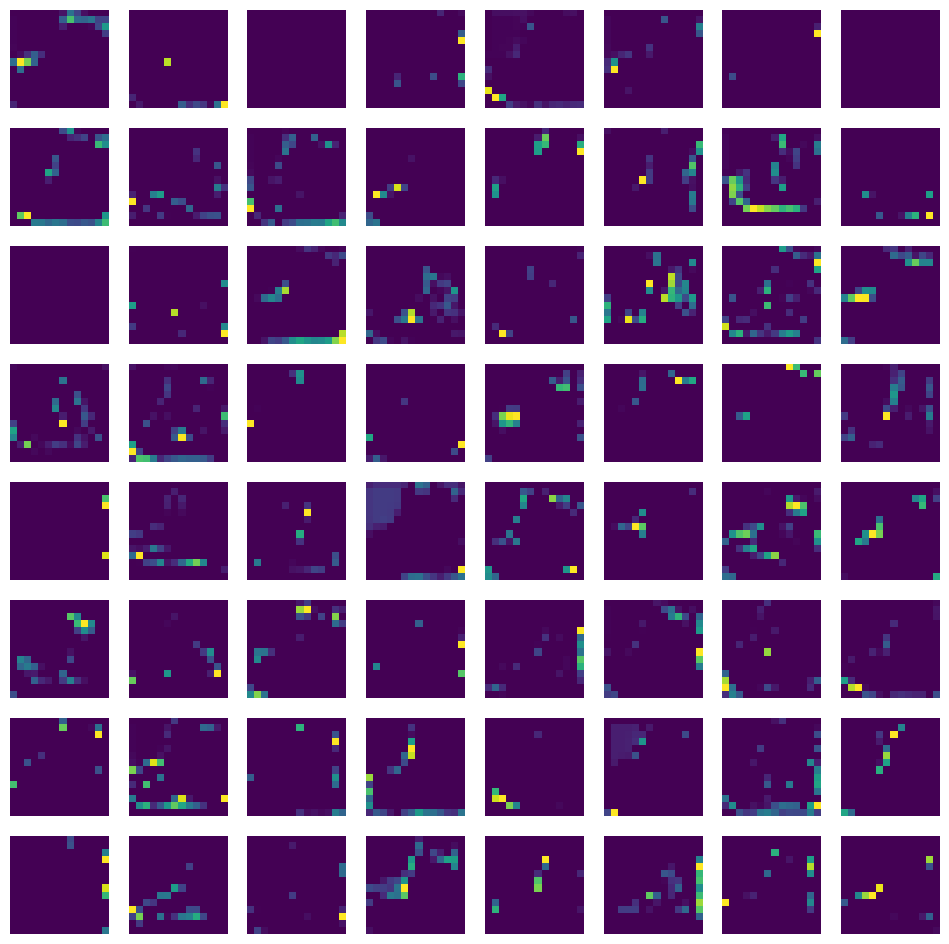

In [48]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    axs[i][j].imshow(feature_maps[0, :, :, i*8+j])
    axs[i][j].axis('off')
plt.show()